In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
# hide
from fastbook import *
from fastai.vision.widgets import *

# Implementing Bear classifier


In [15]:
!pip install duckduckgo-search nbdev

In [16]:
from duckduckgo_search import ddg_images

def search_images(term, max_items = 150):
  print(f'Searching {term} images')
  return L(ddg_images(term, max_results=max_items))

Searching bear images


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


[{'title': 'File:2010-kodiak-bear-1.jpg - Wikimedia Commons', 'image': 'http://upload.wikimedia.org/wikipedia/commons/7/71/2010-kodiak-bear-1.jpg', 'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.6ew2rkwPSyLMwjRN5oZ5aAHaE8&pid=Api', 'url': 'http://commons.wikimedia.org/wiki/File:2010-kodiak-bear-1.jpg', 'height': 1600, 'width': 2400, 'source': 'Bing'}] ['http://upload.wikimedia.org/wikipedia/commons/7/71/2010-kodiak-bear-1.jpg']


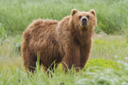

In [27]:
bear_test = search_images('bear', 1)
# doc(L.itemgot)
print(bear_test,bear_test.itemgot('image'))

url = bear_test.itemgot('image')[0]
dest = 'image/bear_test.png'

?download_url # function from pastai
download_url(url, dest)
im = Image.open(dest)
im.to_thumb(128)

## Downloading bear dataset

In [50]:
bear_types = ['grizzly', 'black', 'teddy']
path = Path('bears')

if path.exists():
  shutil.rmtree(path)
else:
  path.mkdir()
  for bear in bear_types:
    dest = path/bear
    dest.mkdir(exist_ok=True)
    results = search_images(f'{bear} bear', max_items=150)
    print(len(results))
    download_images(dest, urls = results.itemgot('image'))

Searching grizzly bear images


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


90
Searching black bear images
90
Searching teddy bear images
90


In [51]:
# Fail check
fns = get_image_files(path)
fns

(#260) [Path('bears/grizzly/4f443586-c065-4392-a4ff-23999b27daa8.jpg'),Path('bears/grizzly/fe2ebcdc-f93d-4bee-9693-8337d23e4ed1.jpg'),Path('bears/grizzly/ba84edf9-7dca-4984-b4e4-19ed85b42f98.jpg'),Path('bears/grizzly/399aa96f-bff9-4afe-b43f-2e77a83ecb98.jpg'),Path('bears/grizzly/70f91a0a-a0e9-4f50-bf57-944af8b8946b.jpg'),Path('bears/grizzly/c5833a60-0ecc-4809-8e27-5694ee00f43f.jpg'),Path('bears/grizzly/3041318b-2b99-483e-a260-4608bf9c92a7.jpg'),Path('bears/grizzly/d1974a0c-5df6-40bf-95bb-0d87dbedd74d.jpg'),Path('bears/grizzly/6148d0ac-6b70-4932-9428-ead3930f4ee5.jpg'),Path('bears/grizzly/40aa2cd2-9407-4327-9bed-e51a00381697.jpg')...]

In [56]:
# Collecting failed images
failed = verify_images(fns)
failed


(#7) [Path('bears/grizzly/5d099aa5-539f-440a-a519-a0e2625d45d1.jpg'),Path('bears/grizzly/bd44adfb-df27-4177-86ce-84ba1d8d7adf.jpg'),Path('bears/teddy/26ac0a7e-34a2-49ae-b0f6-28579afbb028.jpg'),Path('bears/teddy/17530c5b-9702-4acf-98b1-78f78eb59bf4.jpg'),Path('bears/teddy/0552b8b8-029f-44ff-9055-2cc5685edeab.jpg'),Path('bears/teddy/9ef884f3-5308-422d-ab14-4bb2d8e1fa85.JPG'),Path('bears/teddy/53d3ddb1-ef27-4707-b10a-4c877b1cd91a.jpg')]

In [57]:
# Removing
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

## Creating Bears Datablock

In [59]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
    )

### Creating Bear DataLoader

In [61]:
dls = bears.dataloaders(path)

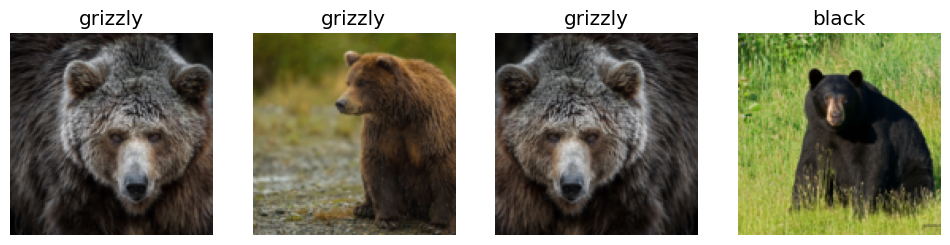

In [64]:
dls.valid.show_batch(max_n = 4, nrows = 1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


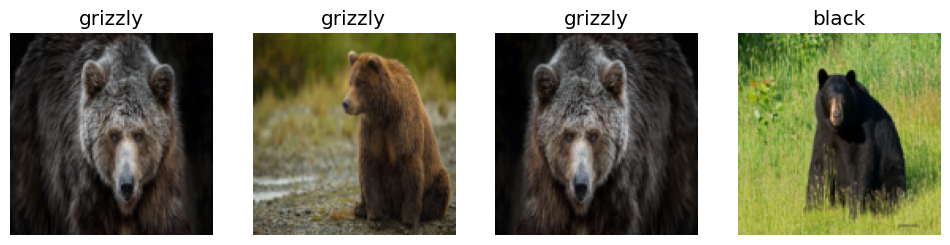

In [66]:
# ResizeMethod = Squish
# Updating the beards dataBlock and creating new dataloader
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)

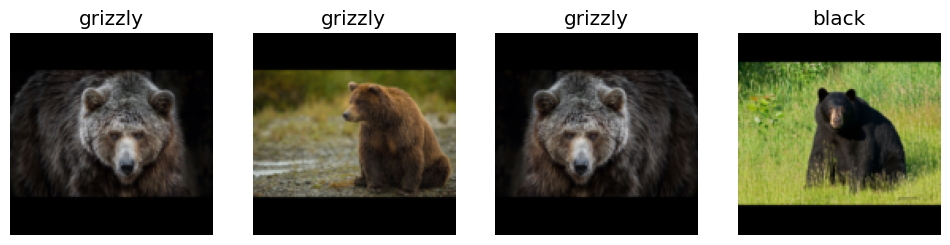

In [69]:
# ResizeMethod = Squish
# Updating the beards dataBlock and creating new dataloader
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)

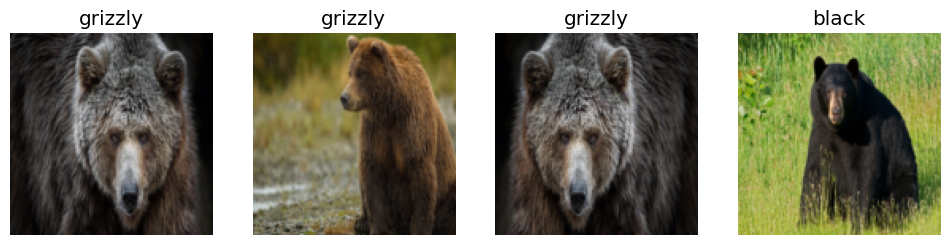

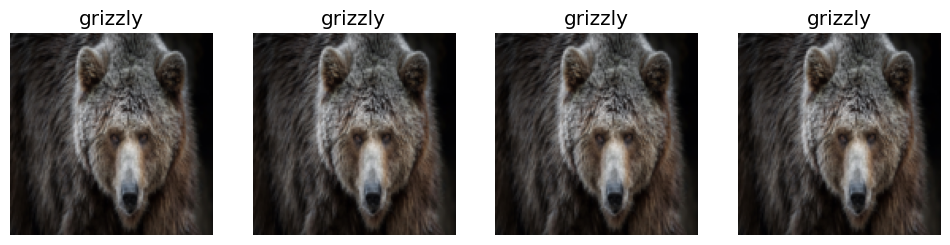

In [77]:
# ResizeMethod = Random
# Updating the beards dataBlock and creating new dataloader
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale = 1))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)
dls.valid.show_batch(max_n = 4, nrows = 1, unique = True)   # Show same image with different cropping